**Carregamento e Preparação dos Dados:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('citi_bike_trips.csv')

print(df.info())

# Conversão de stoptime para datetime
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Calcular starttime subtraindo tripduration de stoptime
df['starttime'] = df['stoptime'] - pd.to_timedelta(df['tripduration'], unit='s')

# Extração da data de starttime
df['start_date'] = df['starttime'].dt.date

# Conversão de tripduration de segundos para minutos
df['tripduration_minutes'] = df['tripduration'] / 60

# Extração da data de starttime
df['start_date'] = df['starttime'].dt.date
df['start_month'] = df['starttime'].dt.to_period('M')
df['start_year'] = df['starttime'].dt.year

# Visão geral dos dados atualizados
print(df.head())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             50000 non-null  int64  
 1   stoptime                 50000 non-null  object 
 2   start_station_id         50000 non-null  int64  
 3   start_station_name       50000 non-null  object 
 4   start_station_latitude   50000 non-null  float64
 5   start_station_longitude  50000 non-null  float64
 6   end_station_id           50000 non-null  int64  
 7   end_station_name         50000 non-null  object 
 8   end_station_latitude     50000 non-null  float64
 9   end_station_longitude    50000 non-null  float64
 10  bikeid                   50000 non-null  int64  
 11  usertype                 50000 non-null  object 
 12  birth_year               45361 non-null  float64
 13  gender                   50000 non-null  object 
 14  customer_plan         

**Análise Descritiva:**

In [ ]:
# Número médio de viagens por dia
avg_daily_trips = df.groupby('start_date').size().mean()

# Estatísticas descritivas da duração das viagens
trip_duration_stats = df['tripduration_minutes'].describe()

print(f"Número médio de viagens por dia: {avg_daily_trips}")
print(trip_duration_stats)


Número médio de viagens por dia: 53.191489361702125
count    50000.000000
mean        16.467894
std        255.792892
min          1.000000
25%          6.433333
50%         10.466667
75%         17.700000
max      54566.066667
Name: tripduration_minutes, dtype: float64


In [ ]:
# Total de viagens
total_trips = df.shape[0]

# Crescimento no número de viagens diárias
daily_trips = df.groupby('start_date').size()
daily_growth = daily_trips.diff().mean()

# Total de viagens por sexo
trips_by_gender = df['gender'].value_counts()

# Total de viagens por idade
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['birth_year']
trips_by_age = df['age'].value_counts()

# Total de viagens por tipo de assinatura
trips_by_usertype = df['usertype'].value_counts()

print(f"Total de viagens: {total_trips}")
print(f"Crescimento médio diário de viagens: {daily_growth}")
print(f"Viagens por gênero:\n{trips_by_gender}")
print(f"Viagens por idade:\n{trips_by_age}")
print(f"Viagens por tipo de assinatura:\n{trips_by_usertype}")


Total de viagens: 50000
Crescimento médio diário de viagens: 0.11182108626198083
Viagens por gênero:
gender
male       33971
female     10256
unknown     5773
Name: count, dtype: int64
Viagens por idade:
age
35.0     1850
37.0     1835
34.0     1799
55.0     1788
39.0     1787
         ... 
97.0        1
89.0        1
103.0       1
95.0        1
106.0       1
Name: count, Length: 78, dtype: int64
Viagens por tipo de assinatura:
usertype
Subscriber    43943
Customer       6057
Name: count, dtype: int64


**Visualizações:**

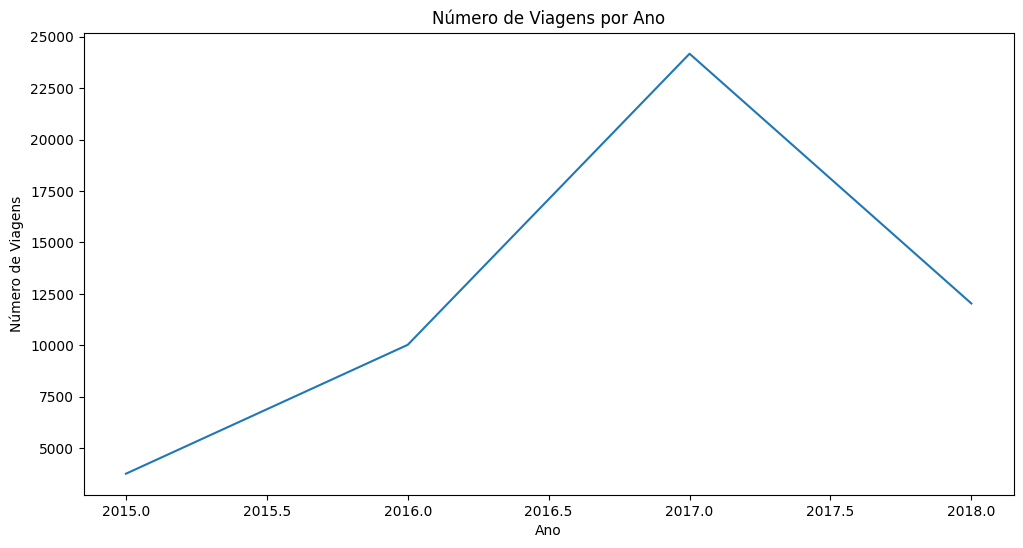

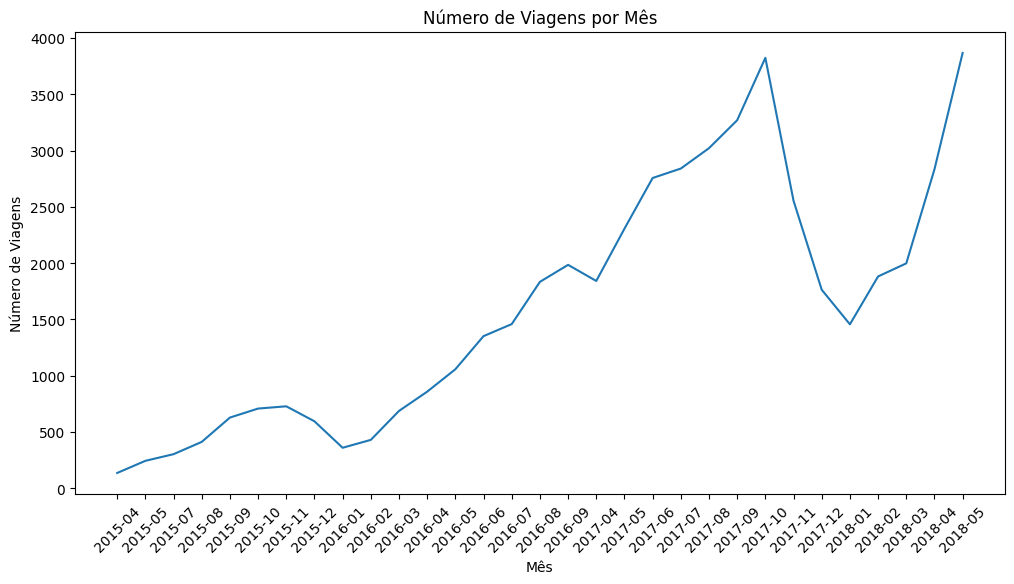

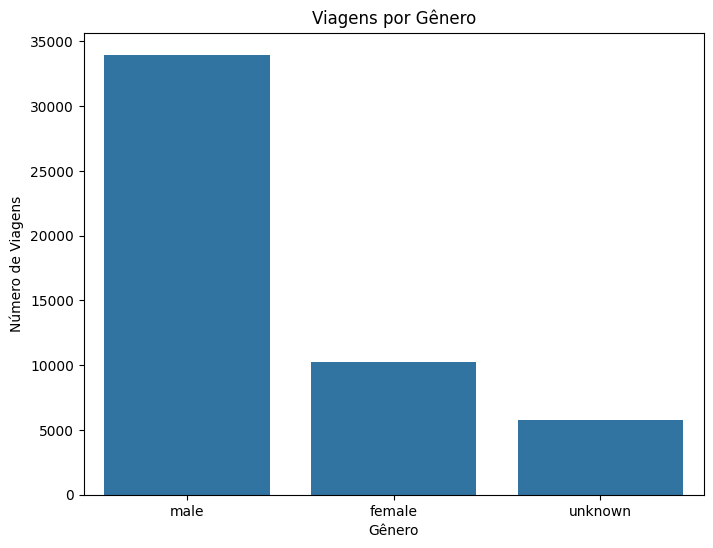

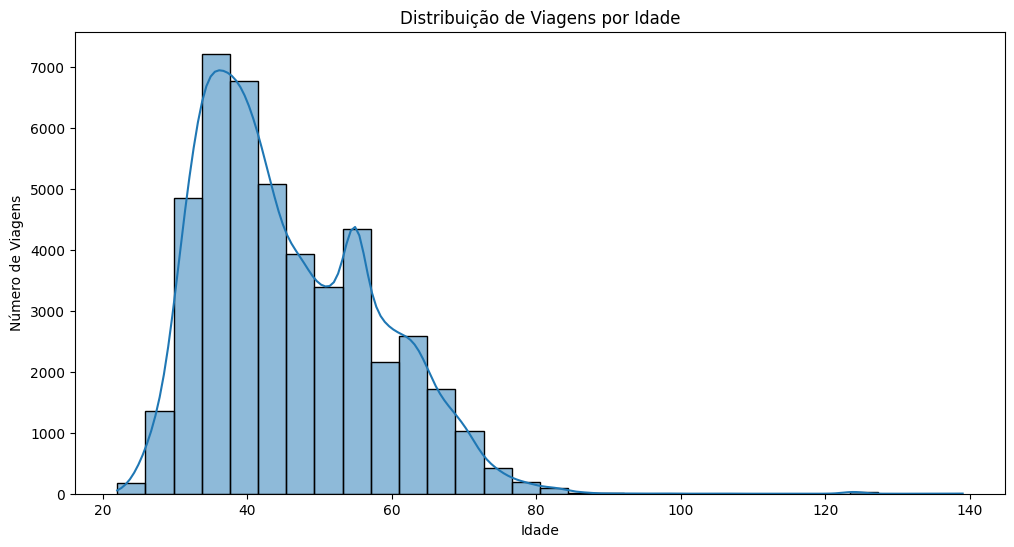

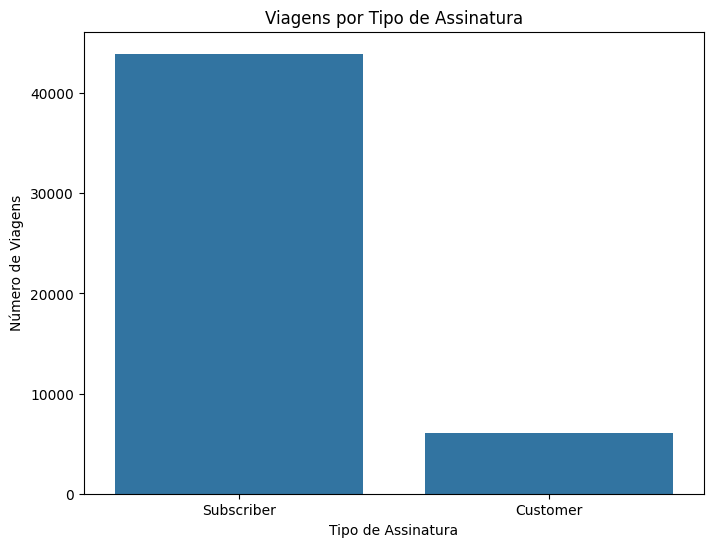

In [ ]:
# Calcular o número de viagens por ano
annual_trips = df.groupby('start_year').size()

# Gráfico de Linha para o Número de Viagens por Ano
plt.figure(figsize=(12, 6))
plt.plot(annual_trips.index, annual_trips.values)
plt.xlabel('Ano')
plt.ylabel('Número de Viagens')
plt.title('Número de Viagens por Ano')
plt.show()

# Calcular o número de viagens por mês
monthly_trips = df.groupby('start_month').size()

# Gráfico de Linha para o Número de Viagens por Mês
plt.figure(figsize=(12, 6))
plt.plot(monthly_trips.index.astype(str), monthly_trips.values)
plt.xlabel('Mês')
plt.ylabel('Número de Viagens')
plt.title('Número de Viagens por Mês')
plt.xticks(rotation=45)
plt.show()

# Gráfico de viagens por gênero
plt.figure(figsize=(8, 6))
sns.barplot(x=trips_by_gender.index, y=trips_by_gender.values)
plt.xlabel('Gênero')
plt.ylabel('Número de Viagens')
plt.title('Viagens por Gênero')
plt.show()

# Gráfico de viagens por idade
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.xlabel('Idade')
plt.ylabel('Número de Viagens')
plt.title('Distribuição de Viagens por Idade')
plt.show()

# Gráfico de viagens por tipo de assinatura
plt.figure(figsize=(8, 6))
sns.barplot(x=trips_by_usertype.index, y=trips_by_usertype.values)
plt.xlabel('Tipo de Assinatura')
plt.ylabel('Número de Viagens')
plt.title('Viagens por Tipo de Assinatura')
plt.show()


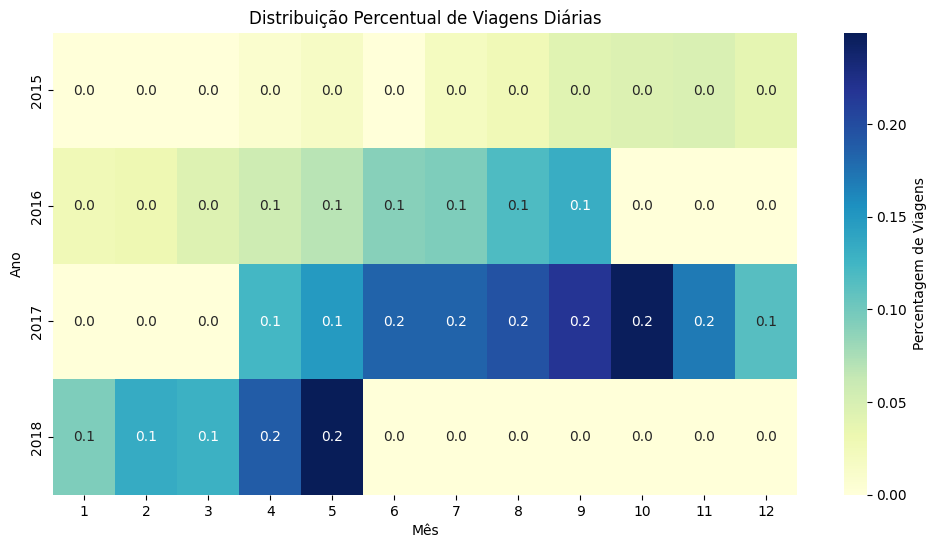

In [ ]:
# Calcular o número de viagens por dia
daily_trips = df.groupby('start_date').size()

# Calcular a percentagem de viagens diárias
daily_percentage = (daily_trips / daily_trips.sum()) * 100

# Preparar os dados para o gráfico de calor
daily_percentage_df = daily_percentage.reset_index()
daily_percentage_df.columns = ['Date', 'Percentage']
daily_percentage_df['Year'] = pd.to_datetime(daily_percentage_df['Date']).dt.year
daily_percentage_df['Month'] = pd.to_datetime(daily_percentage_df['Date']).dt.month

# Criar uma matriz de calor com Year e Month
heatmap_data = daily_percentage_df.pivot_table(values='Percentage', index='Year', columns='Month', fill_value=0)

# Gráfico de Calor da Distribuição Percentual de Viagens Diárias
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Percentagem de Viagens'})
plt.title('Distribuição Percentual de Viagens Diárias')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()


In [ ]:
# Extrair dia da semana e hora do dia
df['day_of_week'] = df['starttime'].dt.day_name()  # Nome do dia da semana
df['hour_of_day'] = df['starttime'].dt.hour        # Hora do dia

# Verificar a extração
print(df[['starttime', 'day_of_week', 'hour_of_day']].head())


            starttime day_of_week  hour_of_day
0 2017-10-01 20:56:35      Sunday           20
1 2018-02-19 22:37:33      Monday           22
2 2017-11-09 17:14:54    Thursday           17
3 2018-05-17 17:56:53    Thursday           17
4 2017-09-17 19:00:05      Sunday           19


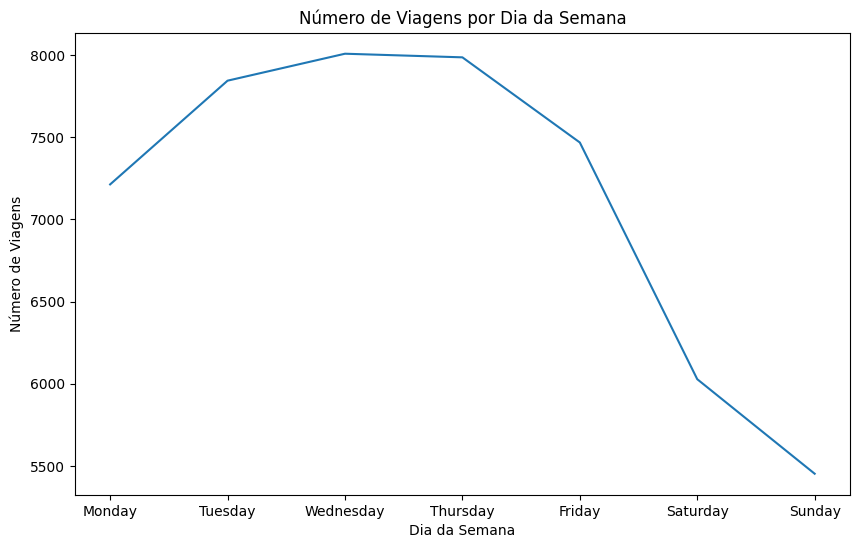

In [ ]:
# Calcular o número de viagens por dia da semana
trips_by_day_of_week = df.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Gráfico de Linhas para o Número de Viagens por Dia da Semana
plt.figure(figsize=(10, 6))
sns.lineplot(x=trips_by_day_of_week.index, y=trips_by_day_of_week.values)
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Viagens')
plt.title('Número de Viagens por Dia da Semana')
plt.show()


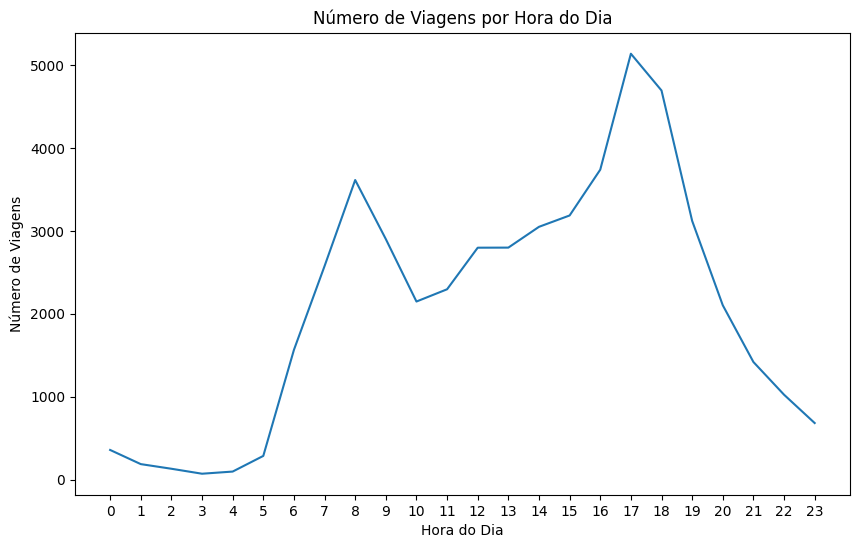

In [ ]:
# Calcular o número de viagens por hora do dia
trips_by_hour_of_day = df.groupby('hour_of_day').size()

# Gráfico de Linhas para o Número de Viagens por Hora do Dia
plt.figure(figsize=(10, 6))
sns.lineplot(x=trips_by_hour_of_day.index, y=trips_by_hour_of_day.values)
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Viagens')
plt.title('Número de Viagens por Hora do Dia')
plt.xticks(range(0, 24))  # Definir os ticks para cada hora
plt.show()


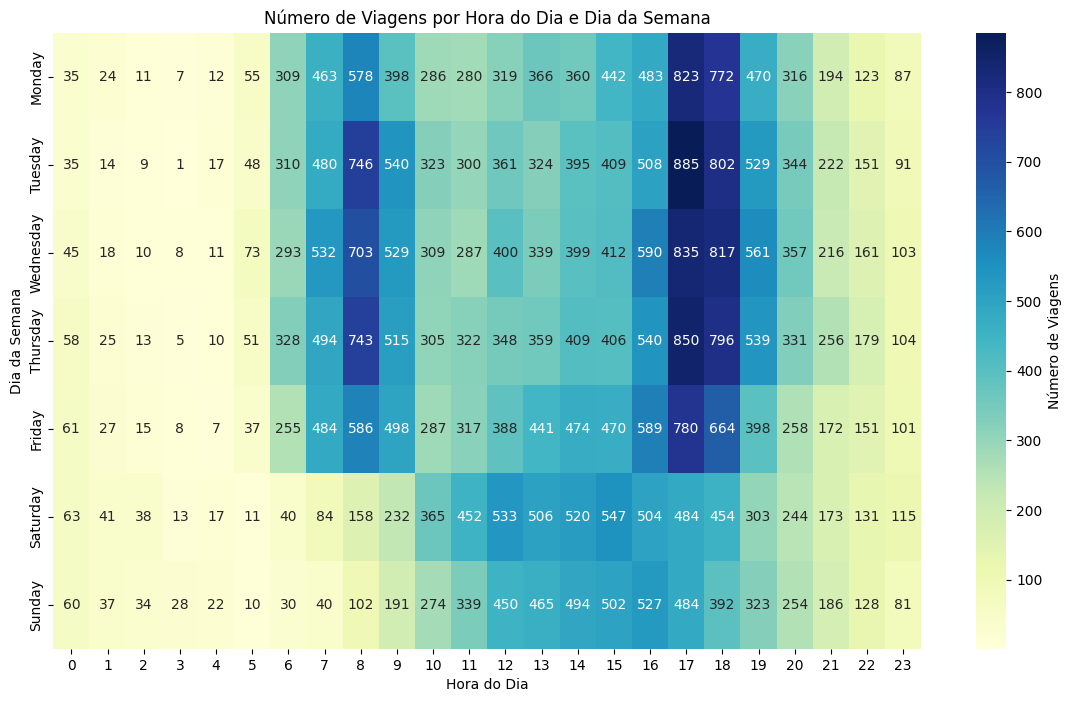

In [ ]:
# Calcular o número de viagens por hora do dia e dia da semana
trips_by_hour_day = df.groupby(['day_of_week', 'hour_of_day']).size().unstack().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Gráfico de Calor para Número de Viagens por Hora do Dia e Dia da Semana
plt.figure(figsize=(14, 8))
sns.heatmap(trips_by_hour_day, cmap="YlGnBu", cbar_kws={'label': 'Número de Viagens'}, annot=True, fmt='d')
plt.title('Número de Viagens por Hora do Dia e Dia da Semana')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.show()


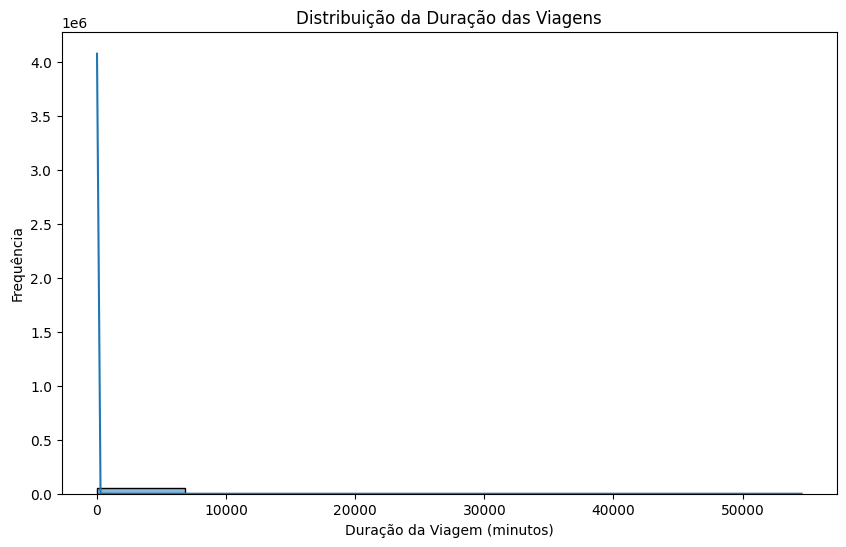

In [ ]:
# Gráfico de Histograma para Distribuição da Duração das Viagens
plt.figure(figsize=(10, 6))
sns.histplot(df['tripduration_minutes'], bins=8, kde=True)
plt.xlabel('Duração da Viagem (minutos)')
plt.ylabel('Frequência')
plt.title('Distribuição da Duração das Viagens')
plt.show()


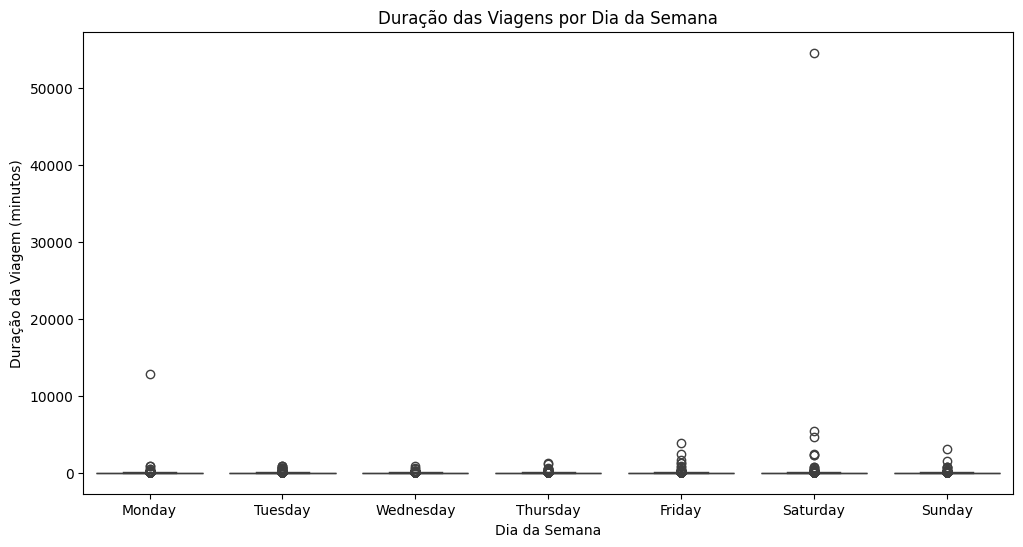

In [ ]:
# Gráfico de Boxplot para Duração das Viagens por Dia da Semana
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='tripduration_minutes', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.xlabel('Dia da Semana')
plt.ylabel('Duração da Viagem (minutos)')
plt.title('Duração das Viagens por Dia da Semana')
plt.show()


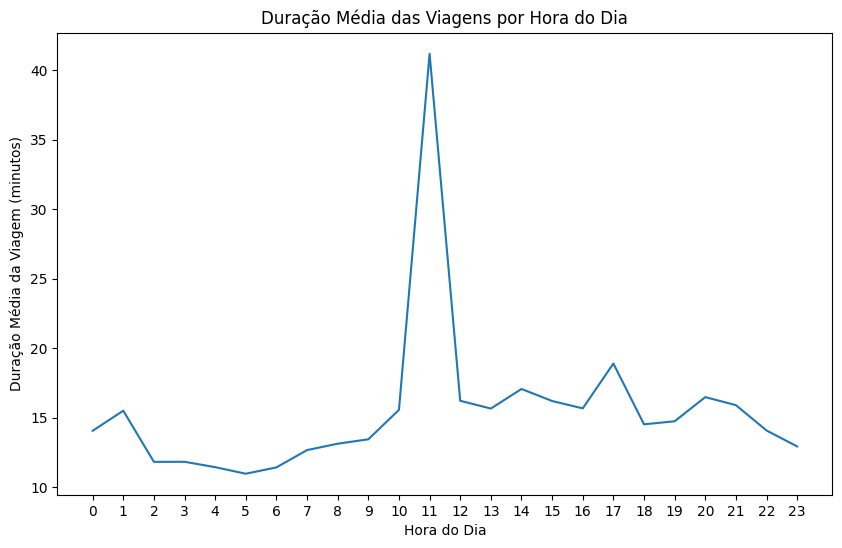

In [ ]:
# Calcular a duração média das viagens por hora do dia
mean_trip_duration_by_hour = df.groupby('hour_of_day')['tripduration_minutes'].mean()

# Gráfico de Linha para Duração Média das Viagens por Hora do Dia
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_trip_duration_by_hour.index, y=mean_trip_duration_by_hour.values)
plt.xlabel('Hora do Dia')
plt.ylabel('Duração Média da Viagem (minutos)')
plt.title('Duração Média das Viagens por Hora do Dia')
plt.xticks(range(0, 24))  # Definir os ticks para cada hora
plt.show()


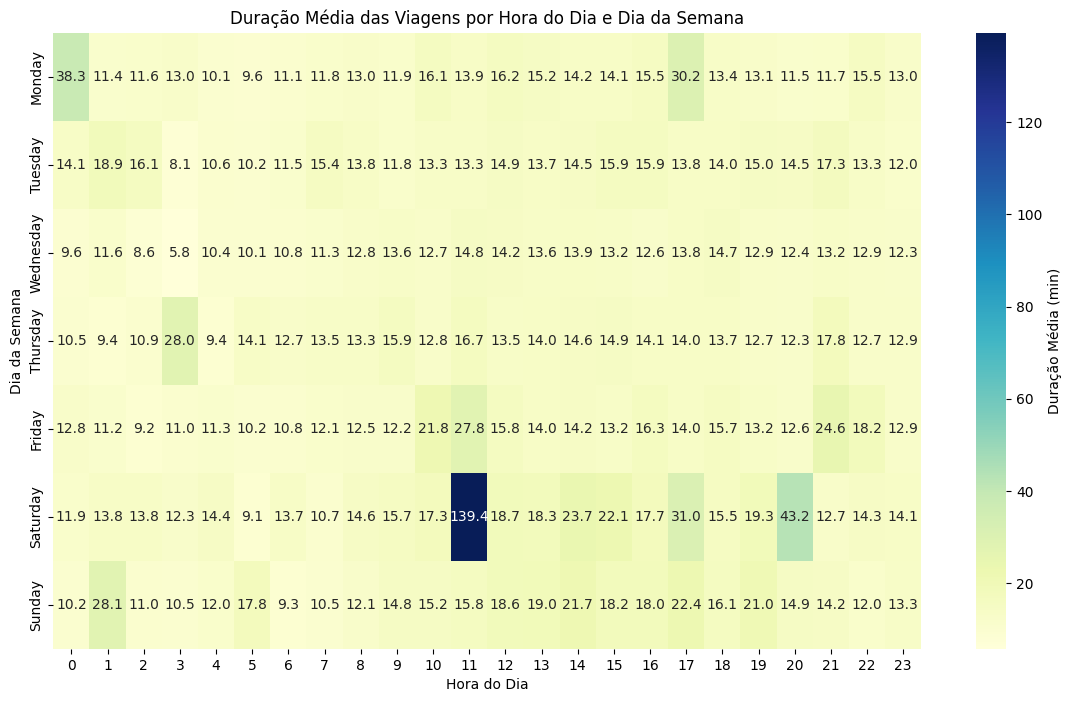

In [ ]:
# Calcular a duração média das viagens por hora do dia e dia da semana
mean_trip_duration_by_hour_day = df.groupby(['day_of_week', 'hour_of_day'])['tripduration_minutes'].mean().unstack().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(14, 8))
sns.heatmap(mean_trip_duration_by_hour_day, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Duração Média (min)'})
plt.title('Duração Média das Viagens por Hora do Dia e Dia da Semana')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.show()


In [ ]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('citi_bike_trips.csv')

# Adicionar variáveis derivadas (dia da semana e idade)
df['starttime'] = pd.to_datetime(df['stoptime']) - pd.to_timedelta(df['tripduration'], unit='s')
df['start_date'] = df['starttime'].dt.date
df['day_of_week'] = df['starttime'].dt.day_name()
df['hour_of_day'] = df['starttime'].dt.hour
df['tripduration_minutes'] = df['tripduration'] / 60
df['start_month'] = df['starttime'].dt.to_period('M')
df['start_year'] = df['starttime'].dt.year
df['age'] = 2023 - df['birth_year']

# Exportar o DataFrame processado para um arquivo CSV
df.to_csv('processed_cycling_data.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
